# Image color picker 

## Goal
pick out colors of article of clothing and convert to readable form (eg purple, magenta).

## First experiment - KMeans clustering of color

Based on: https://stackoverflow.com/questions/37022787/color-detection-of-object-in-image

In [1]:
!pip install pillow

In [2]:
import matplotlib.image as mpimg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import patches
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image

In [3]:
img = mpimg.imread('./red-skirt.jpg')
pimg = Image.open('./red-skirt.jpg')
img.shape

(440, 333, 3)

Transform image to list of individual pixels for clustering

In [4]:
image_array = np.array(img, dtype=np.float64) / 255 # convert to float and scale 0 - 1
w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual pixels

image_array[:5]

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Fit KMeans Model

In [5]:
n_colors = 3 ## 

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
centroids = kmeans.cluster_centers_ ## image average colors
t1 = time()

print('fit time: {0} s'.format(t1 - t0))


centroids

fit time: 0.028008460998535156 s


array([[ 0.99771678,  0.99719971,  0.99711256],
       [ 0.8921686 ,  0.02874251,  0.09613714],
       [ 0.92499379,  0.14167287,  0.22670638]])

centeroids represent 3 average colors in the image

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


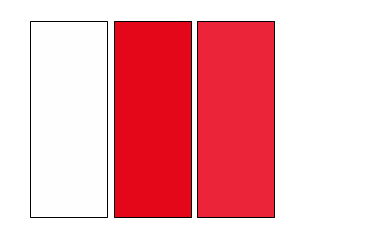

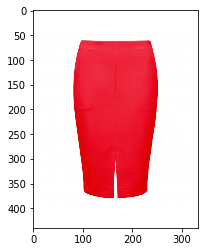

In [6]:
fig = plt.figure()

plt.axis('off')
ax = fig.add_subplot(111)

x_from = 0.00



for cluster_center in kmeans.cluster_centers_:
    ax.add_patch(patches.Rectangle( (x_from, 0.05), 0.23, 0.9, alpha=None, facecolor=tuple(cluster_center), edgecolor='black') )
    x_from = x_from + 0.25

plt.show()
plt.imshow(pimg)
plt.show()

## Evaluate colors

In [7]:
def find_n_best_colors(n, image_array):
    image_array = np.array(image_array, dtype=np.float64) / 255 # convert to float and scale 0 - 1
    w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
    image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000] # sample 1000 random pixels
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample) # find n clusters
    centroids = kmeans.cluster_centers_
    
    return centroids
    
def plot_colors_and_image(colors, img):
    fig = plt.figure()

    plt.axis('off')
    ax = fig.add_subplot(111)

    x_from = 0.00
    
    n = len(colors)
    
    for c in colors:
        ax.add_patch(patches.Rectangle( (x_from, 0.05), ((1/n) - 0.02), 0.9, alpha=None, facecolor=tuple(c), edgecolor='black') )
        x_from = x_from + (1/n)

    if img is None:
        return
    
    plt.show()
    plt.imshow(img)
    plt.show()


In [8]:
image_array = mpimg.imread('./dark-red-dress.jpg')
pil_img = Image.open('./dark-red-dress.jpg')

colors = find_n_best_colors(5, image_array)
colors

array([[ 0.50103605,  0.05570682,  0.20816851],
       [ 0.99791119,  0.99774948,  0.99813355],
       [ 0.70196078,  0.48039216,  0.54754902],
       [ 0.36993464,  0.01477124,  0.14457516],
       [ 0.54151409,  0.0888456 ,  0.22708739]])

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


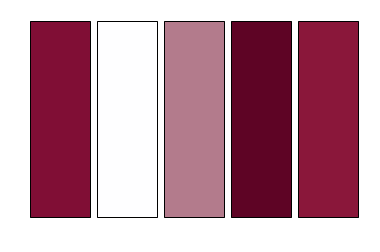

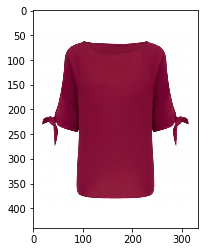

In [9]:
plot_colors_and_image(colors, pil_img)

## Convert color to text

In [10]:
safe = mcolors.CSS4_COLORS

safe

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [11]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb_int = tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3)) ## 255, 255, 255
    rgb_fl = tuple(i / 255 for i in rgb_int)
    
    return rgb_fl

safe_map = { hex_to_rgb(v):k for (k,v) in safe.items()}
safe_map

{(0.0, 0.0, 0.0): 'black',
 (0.0, 0.0, 0.5019607843137255): 'navy',
 (0.0, 0.0, 0.5450980392156862): 'darkblue',
 (0.0, 0.0, 0.803921568627451): 'mediumblue',
 (0.0, 0.0, 1.0): 'blue',
 (0.0, 0.39215686274509803, 0.0): 'darkgreen',
 (0.0, 0.5019607843137255, 0.0): 'green',
 (0.0, 0.5019607843137255, 0.5019607843137255): 'teal',
 (0.0, 0.5450980392156862, 0.5450980392156862): 'darkcyan',
 (0.0, 0.7490196078431373, 1.0): 'deepskyblue',
 (0.0, 0.807843137254902, 0.8196078431372549): 'darkturquoise',
 (0.0, 0.9803921568627451, 0.6039215686274509): 'mediumspringgreen',
 (0.0, 1.0, 0.0): 'lime',
 (0.0, 1.0, 0.4980392156862745): 'springgreen',
 (0.0, 1.0, 1.0): 'cyan',
 (0.09803921568627451,
  0.09803921568627451,
  0.4392156862745098): 'midnightblue',
 (0.11764705882352941, 0.5647058823529412, 1.0): 'dodgerblue',
 (0.12549019607843137,
  0.6980392156862745,
  0.6666666666666666): 'lightseagreen',
 (0.13333333333333333, 0.5450980392156862, 0.13333333333333333): 'forestgreen',
 (0.180392156862

Calculate distance of input to each color point in the list and sort

In [12]:
from scipy.spatial import distance

def get_distance(x,y):
    
    if len(x) == 4:
        x = (x[0], x[1], x[2])
        
    if len(y) == 4:
        y = (y[0], y[1], y[2])
    
    return distance.euclidean(x,y)

def get_closest_point(p, pxs):
    d_min = None
    p_min = None
    
    for px in pxs:
        d = get_distance(p, px)
        
        if d_min is None or d < d_min:
            d_min = d
            p_min = px
        
    return p_min

def get_closest_color(c, colormap):
    named_c = get_closest_point(c, list(colormap.keys()))  
    return colormap[named_c]
    

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


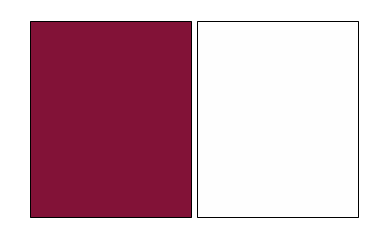

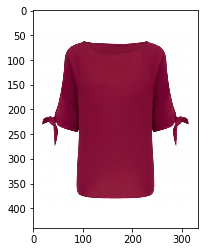

['brown', 'white']

In [14]:
image_array = mpimg.imread('./dark-red-dress.jpg')
pil_img = Image.open('./dark-red-dress.jpg')

colors = find_n_best_colors(2, image_array)
plot_colors_and_image(colors, pil_img)

named_colors = [get_closest_color(c, safe_map) for c in colors]

named_colors


In [15]:
def evaluate_image(path, n):
    image_array = mpimg.imread(path)
    pil_img = Image.open(path)

    colors = find_n_best_colors(n, image_array)
    plot_colors_and_image(colors, pil_img)

    named_colors = [get_closest_color(c, safe_map) for c in colors]
    print(named_colors)

    return (named_colors, colors, pil_img)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


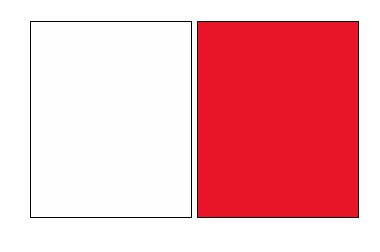

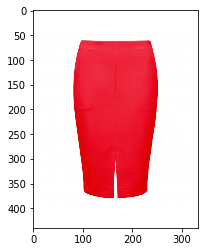

['white', 'crimson']


In [16]:
res = evaluate_image('./red-skirt.jpg', 2)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


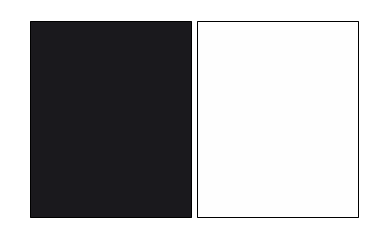

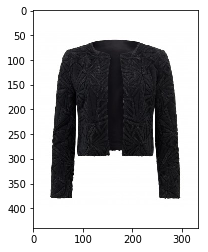

['black', 'white']


In [17]:
res = evaluate_image('./black-jacket.jpg', 2)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


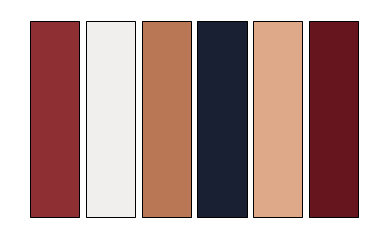

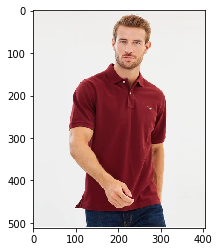

['brown', 'whitesmoke', 'peru', 'darkslategrey', 'burlywood', 'maroon']


In [18]:
res = evaluate_image('./red-shirt.jpg', 6)

**NOTE**- fix for different color depths

figure out how to map alpha color correctly

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


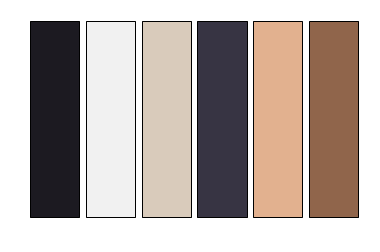

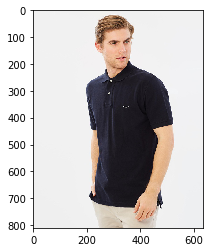

['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna']


In [19]:
res = evaluate_image('./navy-shirt.jpeg', 6)

### Map colors to names  - RAL

In [20]:
ral_colors = pd.read_csv('ral_standard.csv')
ral_colors.head(20)
ral_colors.values

array([['RAL 1000', '190-189-127', '#BEBD7F', ..., 'Beige verdoso',
        'Beige\xa0verdastro', 'Groenbeige'],
       ['RAL 1001', '194-176-120', '#C2B078', ..., 'Beige', 'Beige',
        'Beige'],
       ['RAL 1002', '198-166-100', '#C6A664', ..., 'Amarillo\xa0arena',
        'Giallo sabbia', 'Zandgeel'],
       ..., 
       ['RAL 9018', '215-215-215', '#D7D7D7', ..., 'Blanco papiro',
        'Bianco\xa0papiro', 'Papyruswit'],
       ['RAL 9022', '156-156-156', '#9C9C9C', ..., 'Gris claro perlado',
        'Grigio chiaro perlato', 'Parelmoer-lichtgrijs'],
       ['RAL 9023', '130-130-130', '#828282', ..., 'Gris oscuro perlado',
        'Grigio scuro perlato', 'Parelmoer-donkergrijs']], dtype=object)

In [22]:
def ral_convert():
    ral_map = { row for row in ral_colors.values}